# Importations

In [2]:
#install packages needed 
!pip install matplotlib
!pip install particles

ERROR: unknown command "reinstall" - maybe you meant "install"


In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sb

# Modules from particles
import particles 
from particles import distributions as dists # Where proba distributions are defined
from particles import state_space_models as ssm # Where state-space-models are defined
from particles.collectors import Moments

# Defining our model

Here, I try to define the model, that is the transition kernel (PX) and the emission law (PY). 

As of PX_0, I am not sure how it should be defined in our case. We are $simulating$ the data, thus it a choice of ours

In [ ]:
class expression(ssm.StateSpaceModel):
    """
    default_params = {"eta":, "alpha":, "beta":, "beta_0", "gamma_u":, "gamma_d":,
                     "zeta":, "lamba_u":, "lambda_d": ,
                     "alpha_s":, "kappa_s":}
    """
    def PX0(self): # Distribution of X0 
    
    
    # Transition kernel 
    def PX(self, t, xp): # Distribution of X_t given X_{t-1} = xp (p = past)
        # Here, X involves two things: u_t (0th index) and s_t (1th index)
        # Therefore, we have to define both 
        
        # For u_t 
        
        uni = dists.Uniform(a = 0, b = 1)# A uniform necessary for "choosing" between the different types of moves 
        if xp[:,0] ==0 :
            if uni <= self.eta:
                # Dirac on xp = 0 
                u_t =  dists.Dirac(loc = 0)
            else:
                # Exponential law with rate zeta 
                u_t = dists.LinearD(dists.LogD(dists.Uniform(a = 0, b = 1)), a = - 1 / zeta)
            
        elif xp[:,0] !=0:
            if uni <= alpha:
                # Dirac on xp
                u_t = dists.Dirac(loc = xp[:, 0])
                
            elif uni <= alpha + beta:
                # Exponential law with rate zeta 
                u_t = dists.LinearD(dists.LogD(dists.Uniform(a = 0, b = 1)), a = - 1 / zeta)
            
            elif uni <= alpha + beta + beta_0:
                # Dirac on 0
                u_t = dists.Dirac(loc = 0)
            
            elif uni <= alpha + beta + beta_0 + gamma_u:
                #
                u_t = 
            
            else:
                #
                u_t = 
                
        #For s_t
        uni_s = dists.Uniform(a = 0, b = 1)# A uniform necessary for "choosing" between the different types of moves 
        if uni_s <= alpha_s:
            s_t = dists.Dirac(loc = xp[:,1])
        else:
            s_t = dists.Gamma(a = kappa_s, b = kappa_s)
            
        return IndeProd(u_t, s_t)

            
    # Emission model
    def PY(self, t, xp, x): # Distribution of Y_t given X_t = x (and possibly X_{t-1} =xp)

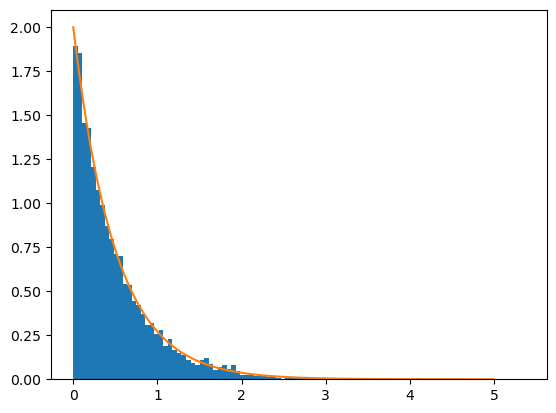

In [16]:
# Test to check my definition of exponential law (implemented based on uniform distribution, given that the exponential law 
# does not seem to be implemented in particles )

zeta = 2
test = dists.LinearD(dists.LogD(dists.Uniform(a = 0, b = 1)), a = - 1 / zeta)

from scipy.stats import expon
plt.hist(test.rvs(size = 10000), bins = 100, density = True)
x = np.linspace(0,5,10000)
plt.plot(x, expon.pdf(x, scale = 1/zeta))

In [19]:
help(dists.Gamma)

Help on class Gamma in module particles.distributions:

class Gamma(ProbDist)
 |  Gamma(a=1.0, b=1.0)
 |  
 |  Gamma(a,b) distribution, scale=1/b.
 |  
 |  Method resolution order:
 |      Gamma
 |      ProbDist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, a=1.0, b=1.0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  logpdf(self, x)
 |  
 |  posterior(self, x)
 |      Model is X_1,...,X_n ~ N(0, 1/theta), theta ~ Gamma(a, b)
 |  
 |  ppf(self, u)
 |  
 |  rvs(self, size=None)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from ProbDist:
 |  
 |  pdf(self, x)
 |  
 |  shape(self, size)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from ProbDist:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 | 